## Fit a competitor binding model to an experiment
Fits binding of calcium to EDTA. There is no competitor in the actual experiment, but we can assert competitor is in the cell and syringe (via `C_cell` and `C_syringe`) to test the function.

In [1]:
%matplotlib inline
import pytc

/home/harmsm/work/programming/git-clones/pytc/pytc/indiv_models/single_site_competitor.py:73: RuntimeWarning: invalid value encountered in sqrt
  theta = np.arccos((-2*alpha**3 + 9*alpha*beta - 27*gamma)/(2*np.sqrt((alpha**2 - 3*beta)**3)))
/home/harmsm/work/programming/git-clones/pytc/pytc/indiv_models/single_site_competitor.py:73: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos((-2*alpha**3 + 9*alpha*beta - 27*gamma)/(2*np.sqrt((alpha**2 - 3*beta)**3)))
/home/harmsm/work/programming/git-clones/pytc/pytc/indiv_models/single_site_competitor.py:75: RuntimeWarning: invalid value encountered in sqrt
  mol_fx_s = (2*np.sqrt(alpha**2 - 3*beta) * np.cos(theta/3) - alpha)/3


# Fit successful? True
# 2017-05-16 08:49:33.898350
# Units: cal/mol
# Fit type: maximum likelihood
# AIC: -104.83904959780503
# AICc: -100.74814050689594
# BIC: -88.92717722529083
# F: 220116.76453887823
# Rsq: 0.9999701466208125
# Rsq_adjusted: 0.999965603715284
# df: 47
# ln(L): 60.419524798902515
# num_obs: 54
# num_param: 7
type,name,exp_file,value,stdev,bot95,top95,fixed,guess,lower_bound,upper_bound
local,dH,ca-edta/tris-01.DH,-1.14913e+04,1.25926e+01,-1.15167e+04,-1.14660e+04,False,-4.00000e+03,-inf,inf
local,dilution_intercept,ca-edta/tris-01.DH,-3.61825e-01,8.42100e-02,-5.31331e-01,-1.92319e-01,False,0.00000e+00,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,-2.09575e+02,5.34061e+02,-1.28458e+03,8.65434e+02,False,0.00000e+00,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,1.08258e+00,1.20957e-04,1.08234e+00,1.08282e+00,False,1.00000e+00,-inf,inf
local,Kcompetitor,ca-edta/tris-01.DH,8.97611e+06,5.32974e+04,8.86882e+06,9.08339e+06,False,1.00000e+06,-inf,inf
local,K,ca-edta/tris

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


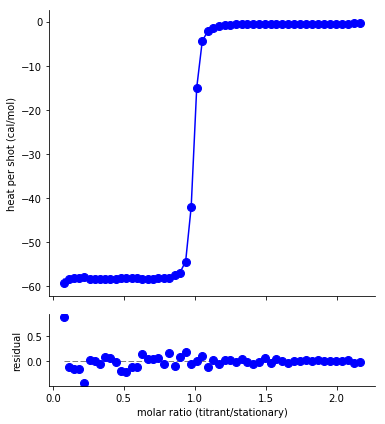

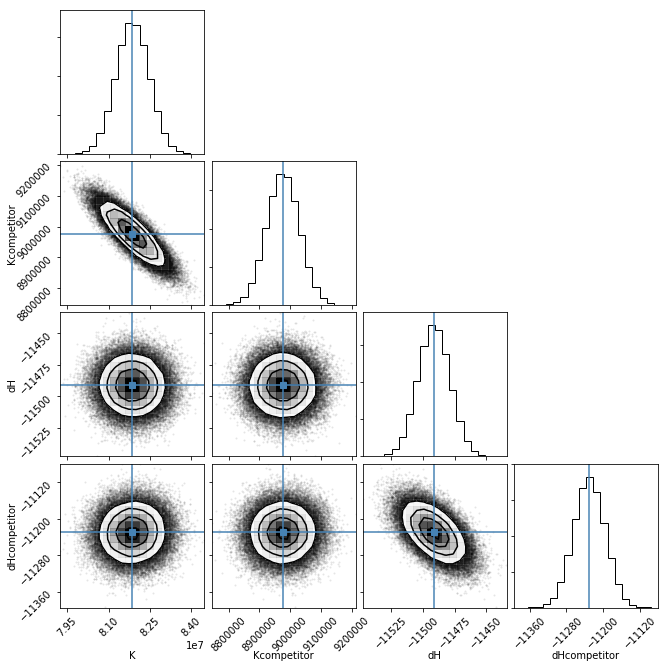

In [2]:
# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single site competitor model,
# with fake 10 uM competitor in the cell and syringe.
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSiteCompetitor,
                       C_cell=1e-5,C_syringe=1e-5,shot_start=2)
# Add the experiment to the fitter
g.add_experiment(a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)
c = g.corner_plot()